In [1]:
import pandas as pd
import numpy as np
import re
from scipy.stats import poisson, skellam
import datetime
import matplotlib.pyplot as plt
%run Helper.py

## Premier League

In [2]:
# instantiate and train up to 2019/2020 season
PL = league()
PL.train_all(league_str='E0', league_below='E1', SEA=list(range(1996, 2022)))

Training Complete


In [7]:
analytics = pd.DataFrame(columns=['SEA', 'BS'])
for SEA in np.unique(PL.trained_data['SEA']):
    filt_df = PL.trained_data[PL.trained_data['SEA']==SEA]
    bs = np.mean(filt_df['BS'])
    analytics = analytics.append(pd.DataFrame({'SEA':SEA, 'BS':bs}, index=[0]), ignore_index=True)
display(analytics)
train_1 = analytics[analytics['SEA']<=2010]

,SEA,BS
0,1996,0.601141
1,1997,0.641099
2,1998,0.608722
3,1999,0.609802
4,2000,0.578894
5,2001,0.597496
6,2002,0.596543
7,2003,0.589051
8,2004,0.613170
9,2005,0.593564


In [8]:
# instantiate and train up to 2019/2020 season
PL = league(w=0.9918799 , w_b=0.6808593, w3=0.9961902, delta=10, 
                 delta_g=360.52808, 
                 promoted=dict({'p_alpha':38.48363, 'q_alpha':51.45347, 'p_beta':50.59193, 'q_beta':47.90914, 
                           'p_gamma':1.45*360.52808, 'q_gamma':360.52808}), 
                 relegated=dict({'p_alpha':53.71, 'q_alpha':44.28, 'p_beta':39.29, 'q_beta':43.43, 
                           'p_gamma':1.45*713.4048222, 'q_gamma':713.4048222}))
            
PL.train_all(league_str='E0', league_below='E1', SEA=list(range(1996, 2022)))

Training Complete


In [23]:
PL = league()
PL.train_all(league_str='E0', SEA=list(range(1996, 2021)))
# 2020/2021 season
new_data = pd.read_csv("https://www.football-data.co.uk/mmz4281/2021/E0.csv")
PL.new_season(teams_out=['Bournemouth', 'Norwich', 'Watford'], teams_promoted_in=['Fulham','Leeds', 'West Brom'])
PL.p_gamma = np.array([101]*20, dtype=float)
PL.q_gamma = np.array([100]*20, dtype=float)
PL.gamma_hat = (PL.p_gamma-1)/PL.q_gamma
PL.train(new_data)
PL.trained_data['SEA'][9500:]=2021

Training Complete


<ipython-input-23-2f72f86afbc5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PL.trained_data['SEA'][9500:]=2021


NameError: name 'PL2' is not defined

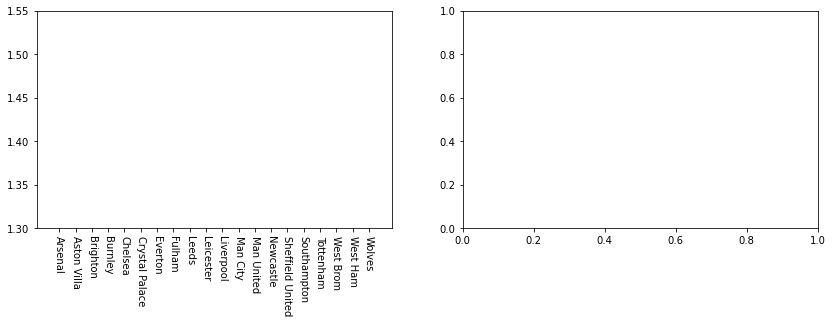

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.bar(height=PL.gamma_hat, x=range(20), tick_label=PL.teams)
ax1.tick_params('x', labelrotation=270)
ax1.set_ylim(1.3, 1.55)

ax2.bar(height=PL2.gamma_hat, x=range(20), tick_label=PL2.teams)
ax2.tick_params('x', labelrotation=270)
ax2.set_ylim(1.3, 1.55)

plt.show()

In [25]:
analytics2 = pd.DataFrame(columns=['SEA', 'BS'])
for SEA in np.unique(PL.trained_data['SEA']):
    filt_df = PL2.trained_data[PL2.trained_data['SEA']==SEA]
    bs = np.mean(filt_df['BS'])
    analytics2 = analytics2.append(pd.DataFrame({'SEA':SEA, 'BS':bs}, index=[0]), ignore_index=True)
display(analytics2)
train_2 = analytics2[analytics2['SEA']<=2010]

NameError: name 'PL2' is not defined

In [26]:
betting = PL.betting_odds(league_str='E0', SEA=list(range(2006, 2022)))
betting['PHome'] = np.array(PL.trained_data[PL.trained_data['SEA']>2005]['PHome'])
betting['PDraw'] = np.array(PL.trained_data[PL.trained_data['SEA']>2005]['PDraw'])
betting['PAway'] = np.array(PL.trained_data[PL.trained_data['SEA']>2005]['PAway'])
betting.head(5)

,Div,SEA,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,BbMxA,BetHome,BetDraw,BetAway,PHome,PDraw,PAway
0,E0,2006,2005-08-13,Aston Villa,Bolton,2,2,D,2.40,3.30,3.40,0.416667,0.303030,0.294118,0.455391,0.273460,0.271149
1,E0,2006,2005-08-13,Everton,Man United,0,2,A,5.65,3.70,1.80,0.176991,0.270270,0.555556,0.244190,0.274213,0.481598
2,E0,2006,2005-08-13,Fulham,Birmingham,0,0,D,2.60,3.30,3.05,0.384615,0.303030,0.327869,0.493590,0.266224,0.240186
3,E0,2006,2005-08-13,Man City,West Brom,0,0,D,1.80,3.63,5.60,0.555556,0.275482,0.178571,0.607604,0.235486,0.156909
4,E0,2006,2005-08-13,Middlesbrough,Liverpool,0,0,D,3.30,3.35,2.50,0.303030,0.298507,0.400000,0.379979,0.283741,0.336280


## Betting Strategy
Here we bet £10 whenever our model predicts that the probability of the home team winning is at least 0.04 greater than the bookies odds suggest

In [34]:
thresh = 0.04
bets = pd.DataFrame(columns = np.append(betting.columns, ['Staked', 'Returned']))
for i in range(betting.shape[0]):
    stakes = 0
    returns = 0
    bet = betting.loc[i,:].copy()
    if bet['PHome'] - bet['BetHome'] > thresh:
        stakes = 10
        if bet['FTR']=='H':
            returns = 10*bet['BbMxH']
        bet['Staked'] = stakes
        bet['Returned'] = returns
        bets = bets.append(bet, ignore_index=True)
        
    if bet['PDraw'] - bet['BetDraw'] > thresh:
        stakes = 10
        if bet['FTR']=='D':
            returns = 10*bet['BbMxD']
        bet['Staked'] = stakes
        bet['Returned'] = returns
        bets = bets.append(bet, ignore_index=True)
        
    if bet['PAway'] - bet['BetAway'] > thresh:
        stakes = 10
        if bet['FTR']=='A':
            returns = 10*bet['BbMxA']
        bet['Staked'] = stakes
        bet['Returned'] = returns
        bets = bets.append(bet, ignore_index=True)
bets[np.append(betting.columns, ['Staked', 'Returned'])].head()

,Div,SEA,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,BbMxA,BetHome,BetDraw,BetAway,PHome,PDraw,PAway,Staked,Returned
0,E0,2006,2005-08-13,Everton,Man United,0,2,A,5.65,3.70,1.80,0.176991,0.270270,0.555556,0.244190,0.274213,0.481598,10,0
1,E0,2006,2005-08-13,Fulham,Birmingham,0,0,D,2.60,3.30,3.05,0.384615,0.303030,0.327869,0.493590,0.266224,0.240186,10,0
2,E0,2006,2005-08-13,Man City,West Brom,0,0,D,1.80,3.63,5.60,0.555556,0.275482,0.178571,0.607604,0.235486,0.156909,10,0
3,E0,2006,2005-08-13,Middlesbrough,Liverpool,0,0,D,3.30,3.35,2.50,0.303030,0.298507,0.400000,0.379979,0.283741,0.336280,10,0
4,E0,2006,2005-08-13,Portsmouth,Tottenham,0,2,A,3.25,3.30,2.50,0.307692,0.303030,0.400000,0.402265,0.269806,0.327929,10,0


In [35]:
print('Money Staked: £' + str(sum(bets['Staked'])))
print('Money Returned: £' + str(round(sum(bets['Returned']), 2)))
print('Total Profit: £' + str(round(sum(bets['Returned'])-sum(bets['Staked']), 2)))
print('Average Percentage Profit: ' + str(round((sum(bets['Returned']-bets['Staked']))/sum(bets['Staked'])*100, 2)) + '%')

Money Staked: £30720
Money Returned: £33994.7
Total Profit: £3274.7
Average Percentage Profit: 10.66%


In [36]:
staked = []
returned = []
for sea in range(2006, 2022):
    filt_data = bets[bets['SEA']==sea]
    first30 = filt_data[0:30]
    stakes = sum(first30['Staked'])
    returns = sum(first30['Returned'])
    staked.append(stakes)
    returned.append(returns)

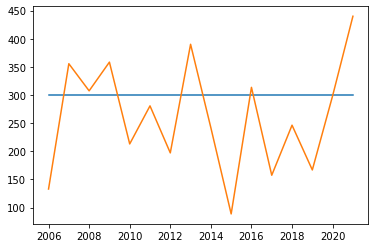

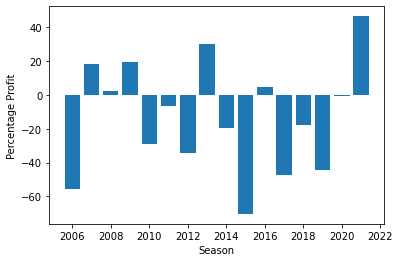

In [37]:
plt.plot(range(2006, 2022), staked)
plt.plot(range(2006, 2022), returned)
plt.show()
plt.bar(height=100*(np.array(returned)-np.array(staked))/np.array(staked),x=range(2006, 2022))
plt.ylabel('Percentage Profit')
plt.xlabel('Season')
plt.show()

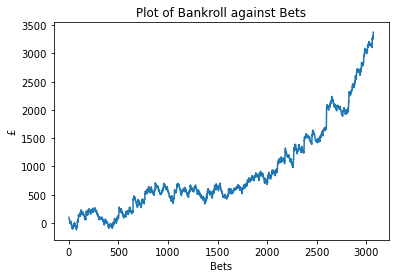

In [38]:
bankroll = 100
tracker = [bankroll]
for i in range(bets.shape[0]):
    bet = bets.iloc[i]
    bankroll = bankroll - bet['Staked'] + bet['Returned']
    tracker.append(bankroll)

plt.plot(tracker)
plt.xlabel('Bets')
plt.ylabel('£')
plt.title('Plot of Bankroll against Bets')
plt.show()

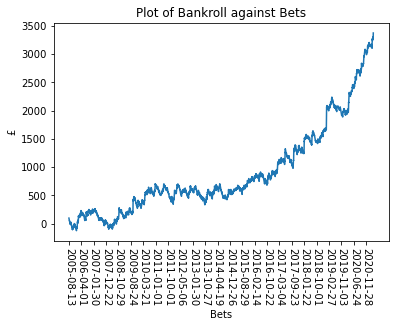

In [39]:
bankroll = 100
tracker = [bankroll]
dates = [np.min(np.unique(bets['Date']))]
for i in range(bets.shape[0]):
    bet = bets.iloc[i]
    bankroll = bankroll - bet['Staked'] + bet['Returned']
    tracker.append(bankroll)
    dates.append(bet['Date'])

index = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2200]
index = range(0, len(tracker), 125)
dates = np.array(dates)
xticks = []
for i in index:
    date = dates[i]
    xticks.append(str(date)[:10])
tracker = np.array(tracker)
plt.plot(tracker)
plt.xticks(ticks=index, labels=xticks, rotation=270)
plt.xlabel('Bets')
plt.ylabel('£')
plt.title('Plot of Bankroll against Bets')
plt.show()

### 2020/2021 Betting Performance

In [40]:
bet2021 = bets[bets['SEA']==2021]
display(bet2021)
print('Staked: £' + str(sum(bet2021['Staked'])))
print('Returned: £' + str(round(sum(bet2021['Returned']), 2)))
print('Percentage Profit: ' + str(round((sum(bet2021['Returned'])/sum(bet2021['Staked'])-1)*100, 2)) + '%')

,Div,SEA,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,BbMxA,BetHome,BetDraw,BetAway,PHome,PDraw,PAway,Staked,Returned
2932,E0,2021,2020-09-13,West Brom,Leicester,0,3,A,4.00,3.82,2.04,0.250000,0.261780,0.490196,0.183339,0.276102,0.540559,10,20.4
2933,E0,2021,2020-09-14,Sheffield United,Wolves,0,2,A,3.46,3.24,2.52,0.289017,0.308642,0.396825,0.258695,0.360457,0.380848,10,0
2934,E0,2021,2020-09-19,Everton,West Brom,5,2,H,1.59,4.50,7.00,0.628931,0.222222,0.142857,0.478561,0.301135,0.220303,10,0
2935,E0,2021,2020-09-19,Everton,West Brom,5,2,H,1.59,4.50,7.00,0.628931,0.222222,0.142857,0.478561,0.301135,0.220303,10,0
2936,E0,2021,2020-09-19,Leeds,Fulham,4,3,H,1.70,4.15,6.00,0.588235,0.240964,0.166667,0.353292,0.324022,0.322687,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,E0,2021,2021-01-27,Chelsea,Wolves,0,0,D,1.69,4.30,6.00,0.591716,0.232558,0.166667,0.506798,0.257420,0.235782,10,0
3068,E0,2021,2021-01-27,Brighton,Fulham,0,0,D,2.14,3.56,4.00,0.467290,0.280899,0.250000,0.390628,0.314490,0.294882,10,0
3069,E0,2021,2021-01-27,Everton,Leicester,1,1,D,2.94,3.40,2.71,0.340136,0.294118,0.369004,0.296839,0.266342,0.436820,10,0
3070,E0,2021,2021-01-27,Man United,Sheffield United,1,2,A,1.32,6.30,12.00,0.757576,0.158730,0.083333,0.615111,0.247783,0.137105,10,0


Staked: £1400
Returned: £2112.6
Percentage Profit: 50.9%


### Kelly Betting Approach
If we start with a bankroll of £100, we use Kelly Criterion to determine the proportion of our bankroll we should wager

In [211]:
def kelly(pmodel, pbetting):
    odds = 1/pbetting
    return pmodel-(1-pmodel)/(odds-1)

In [212]:
bankroll = 100
Kelly_tracker = [bankroll]
Kelly_bets = pd.DataFrame(columns = np.append(betting.columns, ['Staked', 'Returned']))
for i in range(betting.shape[0]):
    stakes = 0
    returns = 0
    bet = betting.loc[i,:].copy()
    if bet['PHome'] > bet['BetHome']:
        stakes = kelly(bet['PHome'], bet['BetHome']) * bankroll
        if bet['FTR']=='H':
            returns = stakes*bet['BbMxH']
        bet['Bankroll'] = bankroll
        bet['Staked'] = stakes
        bet['Returned'] = returns
        bankroll = bankroll - stakes + returns
        bet['New Bankroll'] = bankroll
        Kelly_bets = Kelly_bets.append(bet, ignore_index=True)
        Kelly_tracker.append(bankroll)
Kelly_bets[np.append(betting.columns, ['Bankroll', 'Staked', 'Returned', 'New Bankroll'])].head()

,SEA,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,...,BetHome,BetDraw,BetAway,PHome,PDraw,PAway,Bankroll,Staked,Returned,New Bankroll
0,2006,E0,2005-08-13,Aston Villa,Bolton,2,2,D,2.40,3.30,...,0.416667,0.303030,0.294118,0.457455,0.273179,0.269366,100.000000,6.992204,0,93.007796
1,2006,E0,2005-08-13,Everton,Man United,0,2,A,5.65,3.70,...,0.176991,0.270270,0.555556,0.242427,0.271873,0.485700,93.007796,7.394868,0,85.612928
2,2006,E0,2005-08-13,Fulham,Birmingham,0,0,D,2.60,3.30,...,0.384615,0.303030,0.327869,0.495641,0.266267,0.238092,85.612928,15.446053,0,70.166875
3,2006,E0,2005-08-13,Man City,West Brom,0,0,D,1.80,3.63,...,0.555556,0.275482,0.178571,0.605366,0.239918,0.154716,70.166875,7.863871,0,62.303003
4,2006,E0,2005-08-13,Middlesbrough,Liverpool,0,0,D,3.30,3.35,...,0.303030,0.298507,0.400000,0.380133,0.281157,0.338710,62.303003,6.892319,0,55.410684


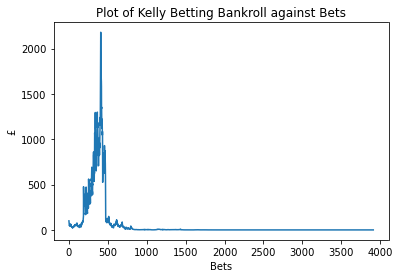

In [213]:
plt.plot(Kelly_tracker)
plt.xlabel('Bets')
plt.ylabel('£')
plt.title('Plot of Kelly Betting Bankroll against Bets')
plt.show()

Thus we will not consider Kelly betting any further

### Seasonal Breakdown of Performance

In [20]:
seasons = np.unique(bets['SEA'])
season_staked = [0]*len(seasons)
season_returned = [0]*len(seasons)

for i in range(len(seasons)):
    season = seasons[i]
    bet = bets[bets['SEA']==season]
    season_staked[i] = sum(bet['Staked'])
    season_returned[i] = sum(bet['Returned'])

seasonal=pd.DataFrame({'Season':seasons, 'Staked':season_staked, 'Returned':season_returned})
seasonal['Profit'] = seasonal['Returned'] - seasonal['Staked']
seasonal['Percentage Profit'] = seasonal['Profit']/seasonal['Staked']*100

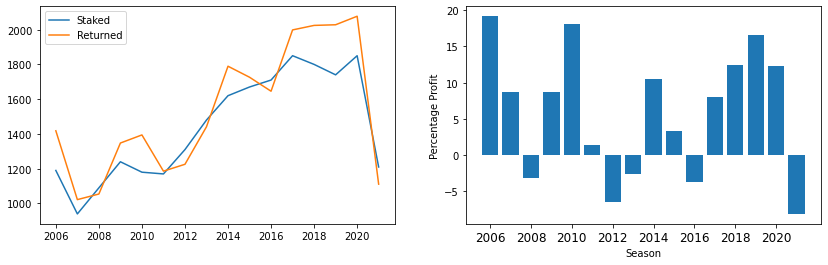

In [21]:
#display(seasonal)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.plot(seasonal['Season'], seasonal['Staked'], label='Staked')
ax1.plot(seasonal['Season'], seasonal['Returned'], label='Returned')
ax1.legend()

ax2.bar(x=range(len(seasonal)), height=seasonal['Percentage Profit'], tick_label=seasonal['Season'])
ax2.set_xticks(np.arange(0, len(seasonal), 2))
ax2.set_xticklabels(seasons[np.arange(0, len(seasonal), 2)], fontsize=12)
ax2.set_xlabel('Season')
ax2.set_ylabel('Percentage Profit')
plt.show()

### Monthly Breakdown of Performance

In [111]:
month_staked = [0]*12
month_returned = [0]*12

for i in range(bets.shape[0]):
    bet = bets.iloc[i, :].copy()
    month = bet['Date'].month - 1
    month_staked[month] += bet['Staked']
    month_returned[month] += bet['Returned']

monthly=pd.DataFrame({'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                     'Staked':month_staked, 'Returned':month_returned})
monthly['Profit'] = monthly['Returned'] - monthly['Staked']
monthly['Percentage Profit'] = monthly['Profit']/monthly['Staked']*100

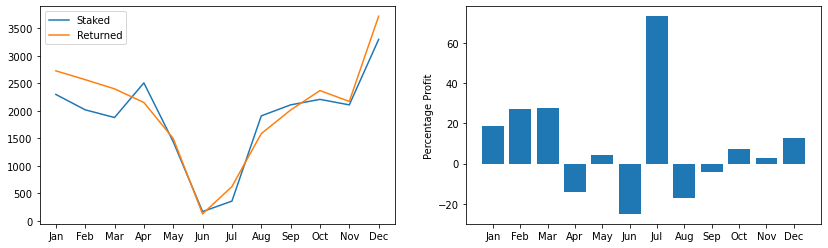

In [112]:
#display(monthly)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.plot(monthly['Month'], monthly['Staked'], label='Staked')
ax1.plot(monthly['Month'], monthly['Returned'], label='Returned')
ax1.legend()

ax2.bar(x=range(12), height=monthly['Percentage Profit'], tick_label=monthly['Month'])
ax2.set_ylabel('Percentage Profit')
plt.show()

## Spanish League 1

In [113]:
# initialise league
SP1 = league()
# train on all data up to 2019/2020 season
SP1.train_all(league_str='SP1', league_below='SP2', SEA=range(1998, 2022))

Training Complete


In [114]:
betting = SP1.betting_odds(league_str='SP1', SEA=list(range(2006, 2022)))
betting['PHome'] = np.array(SP1.trained_data[SP1.trained_data['SEA']>2005]['PHome'])
betting['PDraw'] = np.array(SP1.trained_data[SP1.trained_data['SEA']>2005]['PDraw'])
betting['PAway'] = np.array(SP1.trained_data[SP1.trained_data['SEA']>2005]['PAway'])
betting.head(5)

,Div,SEA,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,BbMxA,BetHome,BetDraw,BetAway,PHome,PDraw,PAway
0,SP1,2006,2005-08-27,Alaves,Barcelona,0,0,D,8.31,4.35,1.55,0.120337,0.229885,0.645161,0.204444,0.254519,0.541037
1,SP1,2006,2005-08-27,Ath Bilbao,Sociedad,3,0,H,2.05,3.30,4.25,0.487805,0.303030,0.235294,0.551145,0.218007,0.230847
2,SP1,2006,2005-08-27,Valencia,Betis,1,0,H,2.10,3.40,4.20,0.476190,0.294118,0.238095,0.573890,0.241407,0.184703
3,SP1,2006,2005-08-28,Ath Madrid,Zaragoza,0,0,D,1.75,3.60,6.11,0.571429,0.277778,0.163666,0.516275,0.259678,0.224047
4,SP1,2006,2005-08-28,Cadiz,Real Madrid,1,2,A,8.80,4.20,1.55,0.113636,0.238095,0.645161,0.224887,0.244500,0.530613


### Determining the best threshold for home, draw and away results

In [220]:
thresholds = np.arange(0, 0.11, 0.01)
thresh_df = pd.DataFrame(columns = ['Type', 'Thresh', 'Staked', 'Returned'])
stakes = 10
for thresh in thresholds:
    print('     ', end="\r")
    print(thresh, end="\r")
    stakedH = 0; stakedD = 0; stakedA = 0
    returnedH = 0; returnedD = 0; returnedA = 0
    bets = pd.DataFrame(columns = np.append(betting.columns, ['Type', 'Staked', 'Returned']))
    
    for i in range(betting.shape[0]):
        bet = betting.loc[i,:].copy()
        if bet['PHome'] - bet['BetHome'] > thresh:
            returns = 0
            stakedH += stakes
            if bet['FTR']=='H':
                returns = 10*bet['BbMxH']
                returned += returns
            bet['Type'] = 'H'
            bet['Staked'] = stakes
            bet['Returned'] = returns
            bets = bets.append(bet, ignore_index=True)
        if bet['PDraw'] - bet['BetDraw'] > thresh:
            returns = 0
            stakedD += stakes
            if bet['FTR']=='D':
                returns = 10*bet['BbMxD']
                returned += returns
            bet['Type'] = 'D'
            bet['Staked'] = stakes
            bet['Returned'] = returns
            bets = bets.append(bet, ignore_index=True)
        if bet['PAway'] - bet['BetAway'] > thresh:
            returns = 0
            stakedA += stakes
            if bet['FTR']=='A':
                returns = 10*bet['BbMxA']
                returned += returns
            bet['Type'] = 'A'
            bet['Staked'] = stakes
            bet['Returned'] = returns
            bets = bets.append(bet, ignore_index=True)
    thresh_df = thresh_df.append(pd.DataFrame(data=[['H', thresh, sum(bets[bets['Type']=='H']['Staked']), sum(bets[bets['Type']=='H']['Returned'])]], 
                    columns=['Type', 'Thresh', 'Staked', 'Returned']))
    thresh_df = thresh_df.append(pd.DataFrame(data=[['D', thresh, sum(bets[bets['Type']=='D']['Staked']), sum(bets[bets['Type']=='D']['Returned'])]], 
                    columns=['Type', 'Thresh', 'Staked', 'Returned']))
    thresh_df = thresh_df.append(pd.DataFrame(data=[['A', thresh, sum(bets[bets['Type']=='A']['Staked']), sum(bets[bets['Type']=='A']['Returned'])]], 
                    columns=['Type', 'Thresh', 'Staked', 'Returned']))

In [221]:
thresh_df['Profit'] = thresh_df['Returned'] - thresh_df['Staked']
thresh_df['Percentage Profit'] = thresh_df['Profit']/thresh_df['Staked'] * 100

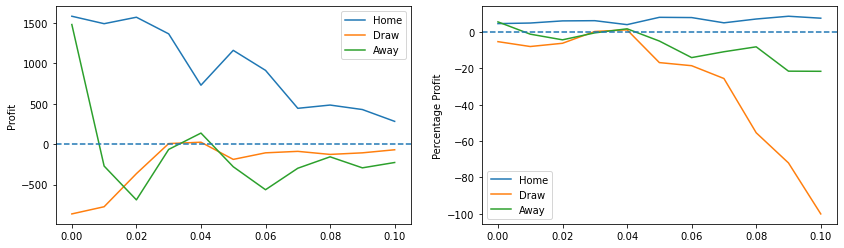

In [222]:
#display(seasonal)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.plot('Thresh', 'Profit', data=thresh_df[thresh_df['Type']=='H'], label='Home')
ax1.plot('Thresh', 'Profit', data=thresh_df[thresh_df['Type']=='D'], label='Draw')
ax1.plot('Thresh', 'Profit', data=thresh_df[thresh_df['Type']=='A'], label='Away')
ax1.legend()
ax1.set_ylabel('Profit')
ax1.axhline(y=0, linestyle='--')

ax2.plot('Thresh', 'Percentage Profit', data=thresh_df[thresh_df['Type']=='H'], label='Home')
ax2.plot('Thresh', 'Percentage Profit', data=thresh_df[thresh_df['Type']=='D'], label='Draw')
ax2.plot('Thresh', 'Percentage Profit', data=thresh_df[thresh_df['Type']=='A'], label='Away')
ax2.legend()
ax2.set_ylabel('Percentage Profit')
ax2.axhline(y=0, linestyle='--')
plt.show()

In [115]:
thresh = 0.05
staked = 0
returned = 0
bets = pd.DataFrame(columns = np.append(betting.columns, ['Type', 'Staked', 'Returned']))
for i in range(betting.shape[0]):
    stakes = 0
    returns = 0
    bet = betting.loc[i,:].copy()
    if bet['PHome'] - bet['BetHome'] > thresh:
        stakes = 10
        staked += stakes
        if bet['FTR']=='H':
            returns = 10*bet['BbMxH']
            returned += returns
        bet['Type'] = 'H'
        bet['Staked'] = stakes
        bet['Returned'] = returns
        bets = bets.append(bet, ignore_index=True)
bets[np.append(betting.columns, ['Type', 'Staked', 'Returned'])].head()

,Div,SEA,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,BbMxA,BetHome,BetDraw,BetAway,PHome,PDraw,PAway,Type,Staked,Returned
0,SP1,2006,2005-08-27,Alaves,Barcelona,0,0,D,8.31,4.35,1.55,0.120337,0.229885,0.645161,0.204444,0.254519,0.541037,H,10,0
1,SP1,2006,2005-08-27,Ath Bilbao,Sociedad,3,0,H,2.05,3.30,4.25,0.487805,0.303030,0.235294,0.551145,0.218007,0.230847,H,10,20.5
2,SP1,2006,2005-08-27,Valencia,Betis,1,0,H,2.10,3.40,4.20,0.476190,0.294118,0.238095,0.573890,0.241407,0.184703,H,10,21
3,SP1,2006,2005-08-28,Cadiz,Real Madrid,1,2,A,8.80,4.20,1.55,0.113636,0.238095,0.645161,0.224887,0.244500,0.530613,H,10,0
4,SP1,2006,2005-09-10,La Coruna,Ath Madrid,1,0,H,2.30,3.30,3.85,0.434783,0.303030,0.259740,0.518676,0.270955,0.210369,H,10,23


In [116]:
print('Money Staked: £' + str(sum(bets['Staked'])))
print('Money Returned: £' + str(round(sum(bets['Returned']), 2)))
print('Total Profit: £' + str(round(sum(bets['Returned'])-sum(bets['Staked']), 2)))
print('Average Percentage Profit: ' + str(round((sum(bets['Returned']-bets['Staked']))/sum(bets['Staked'])*100, 2)) + '%')

Money Staked: £14630
Money Returned: £15798.4
Total Profit: £1168.4
Average Percentage Profit: 7.99%


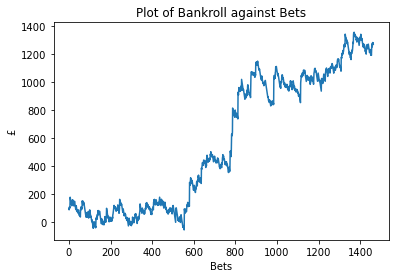

In [117]:
bankroll = 100
tracker = [bankroll]
for i in range(bets.shape[0]):
    bet = bets.iloc[i]
    bankroll = bankroll - bet['Staked'] + bet['Returned']
    tracker.append(bankroll)

plt.plot(tracker)
plt.xlabel('Bets')
plt.ylabel('£')
plt.title('Plot of Bankroll against Bets')
plt.show()

In [118]:
seasons = np.unique(bets['SEA'])
season_staked = [0]*len(seasons)
season_returned = [0]*len(seasons)

for i in range(len(seasons)):
    season = seasons[i]
    bet = bets[bets['SEA']==season]
    season_staked[i] = sum(bet['Staked'])
    season_returned[i] = sum(bet['Returned'])

seasonal=pd.DataFrame({'Season':seasons, 'Staked':season_staked, 'Returned':season_returned})
seasonal['Profit'] = seasonal['Returned'] - seasonal['Staked']
seasonal['Percentage Profit'] = seasonal['Profit']/seasonal['Staked']*100

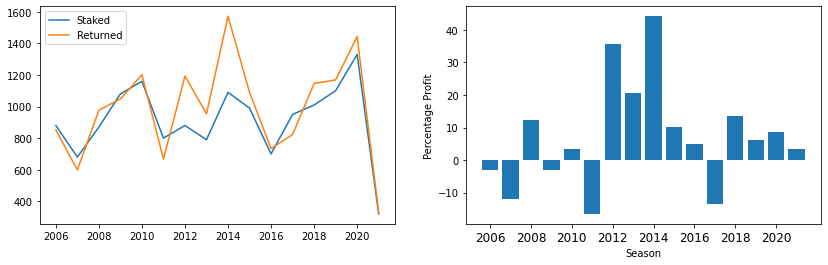

In [119]:
#display(seasonal)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.plot(seasonal['Season'], seasonal['Staked'], label='Staked')
ax1.plot(seasonal['Season'], seasonal['Returned'], label='Returned')
ax1.legend()

ax2.bar(x=range(len(seasonal)), height=seasonal['Percentage Profit'], tick_label=seasonal['Season'])
ax2.set_xticks(np.arange(0, len(seasonal), 2)) 
ax2.set_xticklabels(seasons[np.arange(0, len(seasonal), 2)], fontsize=12)
ax2.set_xlabel('Season')
ax2.set_ylabel('Percentage Profit')

plt.show()

In [120]:
month_staked = [0]*12
month_returned = [0]*12

for i in range(bets.shape[0]):
    bet = bets.iloc[i, :].copy()
    month = bet['Date'].month - 1
    month_staked[month] += bet['Staked']
    month_returned[month] += bet['Returned']

monthly=pd.DataFrame({'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                     'Staked':month_staked, 'Returned':month_returned})
monthly['Profit'] = monthly['Returned'] - monthly['Staked']
monthly['Percentage Profit'] = monthly['Profit']/monthly['Staked']*100

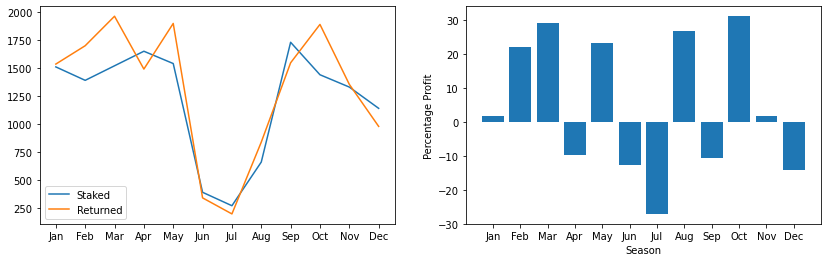

In [230]:
#display(monthly)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.plot(monthly['Month'], monthly['Staked'], label='Staked')
ax1.plot(monthly['Month'], monthly['Returned'], label='Returned')
ax1.legend()

ax2.bar(x=range(12), height=monthly['Percentage Profit'], tick_label=monthly['Month'])
ax2.set_xlabel('Season')
ax2.set_ylabel('Percentage Profit')
plt.show()

### 2020/2021 Results

In [123]:
bet2021 = bets[bets['SEA']==2021]
display(bet2021)
print('Staked: £' + str(sum(bet2021['Staked'])))
print('Returned: £' + str(round(sum(bet2021['Returned']), 2)))
print('Percentage Profit: ' + str(round((sum(bet2021['Returned'])/sum(bet2021['Staked'])-1)*100, 2)) + '%')

,Div,SEA,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,BbMxA,BetHome,BetDraw,BetAway,PHome,PDraw,PAway,Type,Staked,Returned
1431,SP1,2021,2020-09-12,Eibar,Celta,0,0,D,2.66,3.27,3.13,0.375940,0.305810,0.319489,0.473893,0.263552,0.262555,H,10,0
1432,SP1,2021,2020-09-12,Granada,Ath Bilbao,2,0,H,2.92,3.22,2.89,0.342466,0.310559,0.346021,0.422135,0.298064,0.279801,H,10,29.2
1433,SP1,2021,2020-09-12,Cadiz,Osasuna,0,2,A,2.93,3.08,2.97,0.341297,0.324675,0.336700,0.410600,0.286244,0.303156,H,10,0
1434,SP1,2021,2020-09-13,Alaves,Betis,0,1,A,2.99,3.35,2.76,0.334448,0.298507,0.362319,0.408616,0.275711,0.315672,H,10,0
1435,SP1,2021,2020-09-13,Villarreal,Huesca,1,1,D,1.60,4.30,6.50,0.625000,0.232558,0.153846,0.682676,0.194699,0.122624,H,10,0
1436,SP1,2021,2020-09-13,Valencia,Levante,4,2,H,2.16,3.70,3.72,0.462963,0.270270,0.268817,0.554144,0.233909,0.211947,H,10,21.6
1437,SP1,2021,2020-09-19,Getafe,Osasuna,1,0,H,2.06,3.32,4.60,0.485437,0.301205,0.217391,0.554314,0.271109,0.174577,H,10,20.6
1438,SP1,2021,2020-09-20,Granada,Alaves,2,1,H,2.15,3.26,4.40,0.465116,0.306748,0.227273,0.562240,0.258565,0.179195,H,10,21.5
1439,SP1,2021,2020-09-20,Sociedad,Real Madrid,0,0,D,5.05,4.00,1.80,0.198020,0.250000,0.555556,0.290104,0.250909,0.458987,H,10,0
1440,SP1,2021,2020-09-26,Valencia,Huesca,1,1,D,2.13,3.54,4.00,0.469484,0.282486,0.250000,0.639360,0.219919,0.140721,H,10,0


Staked: £320
Returned: £331.2
Percentage Profit: 3.5%


## German League 

In [124]:
# initialise league
D1 = league()
# train on all data up to 2019/2020 season
D1.train_all(league_str='D1', league_below='D2', SEA=range(1996, 2022))

# get betting data
betting = D1.betting_odds(league_str='D1', SEA=list(range(2006, 2022)))
betting['PHome'] = np.array(D1.trained_data[D1.trained_data['SEA']>2005]['PHome'])
betting['PDraw'] = np.array(D1.trained_data[D1.trained_data['SEA']>2005]['PDraw'])
betting['PAway'] = np.array(D1.trained_data[D1.trained_data['SEA']>2005]['PAway'])
betting.head(5)

Training Complete


,Div,SEA,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,BbMxA,BetHome,BetDraw,BetAway,PHome,PDraw,PAway
0,D1,2006,2005-08-05,Bayern Munich,M'gladbach,3,0,H,1.40,5.00,10.35,0.714286,0.200000,0.096618,0.777704,0.148528,0.073767
1,D1,2006,2005-08-06,Duisburg,Stuttgart,1,1,D,3.35,3.35,2.35,0.298507,0.298507,0.425532,0.268172,0.284546,0.447282
2,D1,2006,2005-08-06,FC Koln,Mainz,1,0,H,2.15,3.45,3.80,0.465116,0.289855,0.263158,0.425445,0.276038,0.298517
3,D1,2006,2005-08-06,Hamburg,Nurnberg,3,0,H,1.65,4.10,7.20,0.606061,0.243902,0.138889,0.595303,0.207401,0.197297
4,D1,2006,2005-08-06,Hannover,Hertha,2,2,D,2.90,3.45,2.70,0.344828,0.289855,0.370370,0.348031,0.282549,0.369420


In [232]:
thresholds = np.arange(0, 0.11, 0.01)
thresh_df = pd.DataFrame(columns = ['Type', 'Thresh', 'Staked', 'Returned'])
stakes = 10
for thresh in thresholds:
    print('     ', end="\r")
    print(thresh, end="\r")
    stakedH = 0; stakedD = 0; stakedA = 0
    returnedH = 0; returnedD = 0; returnedA = 0
    bets = pd.DataFrame(columns = np.append(betting.columns, ['Type', 'Staked', 'Returned']))
    
    for i in range(betting.shape[0]):
        bet = betting.loc[i,:].copy()
        if bet['PHome'] - bet['BetHome'] > thresh:
            returns = 0
            stakedH += stakes
            if bet['FTR']=='H':
                returns = 10*bet['BbMxH']
                returned += returns
            bet['Type'] = 'H'
            bet['Staked'] = stakes
            bet['Returned'] = returns
            bets = bets.append(bet, ignore_index=True)
        if bet['PDraw'] - bet['BetDraw'] > thresh:
            returns = 0
            stakedD += stakes
            if bet['FTR']=='D':
                returns = 10*bet['BbMxD']
                returned += returns
            bet['Type'] = 'D'
            bet['Staked'] = stakes
            bet['Returned'] = returns
            bets = bets.append(bet, ignore_index=True)
        if bet['PAway'] - bet['BetAway'] > thresh:
            returns = 0
            stakedA += stakes
            if bet['FTR']=='A':
                returns = 10*bet['BbMxA']
                returned += returns
            bet['Type'] = 'A'
            bet['Staked'] = stakes
            bet['Returned'] = returns
            bets = bets.append(bet, ignore_index=True)
    thresh_df = thresh_df.append(pd.DataFrame(data=[['H', thresh, sum(bets[bets['Type']=='H']['Staked']), sum(bets[bets['Type']=='H']['Returned'])]], 
                    columns=['Type', 'Thresh', 'Staked', 'Returned']), ignore_index=True)
    thresh_df = thresh_df.append(pd.DataFrame(data=[['D', thresh, sum(bets[bets['Type']=='D']['Staked']), sum(bets[bets['Type']=='D']['Returned'])]], 
                    columns=['Type', 'Thresh', 'Staked', 'Returned']), ignore_index=True)
    thresh_df = thresh_df.append(pd.DataFrame(data=[['A', thresh, sum(bets[bets['Type']=='A']['Staked']), sum(bets[bets['Type']=='A']['Returned'])]], 
                    columns=['Type', 'Thresh', 'Staked', 'Returned']), ignore_index=True)

In [237]:
thresh_df['Profit'] = thresh_df['Returned'] - thresh_df['Staked']
for i in range(len(thresh_df['Staked'])):
    if thresh_df.loc[i, 'Staked']==0:
        thresh_df.loc[i, 'Staked']=0.001
thresh_df['Percentage Profit'] = thresh_df['Profit']/thresh_df['Staked'] * 100

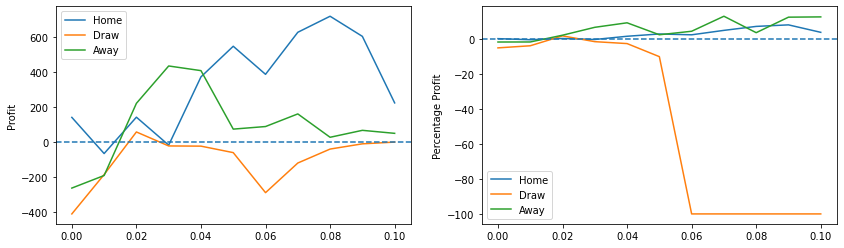

In [238]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.plot('Thresh', 'Profit', data=thresh_df[thresh_df['Type']=='H'], label='Home')
ax1.plot('Thresh', 'Profit', data=thresh_df[thresh_df['Type']=='D'], label='Draw')
ax1.plot('Thresh', 'Profit', data=thresh_df[thresh_df['Type']=='A'], label='Away')
ax1.legend()
ax1.set_ylabel('Profit')
ax1.axhline(y=0, linestyle='--')

ax2.plot('Thresh', 'Percentage Profit', data=thresh_df[thresh_df['Type']=='H'], label='Home')
ax2.plot('Thresh', 'Percentage Profit', data=thresh_df[thresh_df['Type']=='D'], label='Draw')
ax2.plot('Thresh', 'Percentage Profit', data=thresh_df[thresh_df['Type']=='A'], label='Away')
ax2.legend()
ax2.set_ylabel('Percentage Profit')
ax2.axhline(y=0, linestyle='--')
plt.show()

In [125]:
threshH = 0.08
threshA = 0.04
staked = 0
returned = 0
bets = pd.DataFrame(columns = np.append(betting.columns, ['Type', 'Staked', 'Returned']))
for i in range(betting.shape[0]):
    stakes = 0
    returns = 0
    bet = betting.loc[i,:].copy()
    if bet['PHome'] - bet['BetHome'] > threshH:
        stakes = 10
        staked += stakes
        if bet['FTR']=='H':
            returns = 10*bet['BbMxH']
            returned += returns
        bet['Type'] = 'H'
        bet['Staked'] = stakes
        bet['Returned'] = returns
        bets = bets.append(bet, ignore_index=True)
    if bet['PAway'] - bet['BetAway'] > threshA:
        stakes = 10
        staked += stakes
        if bet['FTR']=='A':
            returns = 10*bet['BbMxA']
            returned += returns
        bet['Type'] = 'A'
        bet['Staked'] = stakes
        bet['Returned'] = returns
        bets = bets.append(bet, ignore_index=True)
bets[np.append(betting.columns, ['Type', 'Staked', 'Returned'])].head()

,Div,SEA,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,BbMxA,BetHome,BetDraw,BetAway,PHome,PDraw,PAway,Type,Staked,Returned
0,D1,2006,2005-08-06,Hamburg,Nurnberg,3,0,H,1.65,4.1,7.20,0.606061,0.243902,0.138889,0.595303,0.207401,0.197297,A,10,0
1,D1,2006,2005-08-07,Ein Frankfurt,Leverkusen,1,4,A,3.00,3.4,2.40,0.333333,0.294118,0.416667,0.260355,0.248368,0.491277,A,10,24
2,D1,2006,2005-08-13,Bielefeld,Hamburg,0,2,A,3.60,3.5,2.25,0.277778,0.285714,0.444444,0.364745,0.262020,0.373235,H,10,0
3,D1,2006,2005-08-13,Dortmund,Schalke 04,1,2,A,2.75,3.4,2.75,0.363636,0.294118,0.363636,0.496968,0.247977,0.255055,H,10,0
4,D1,2006,2005-08-13,Leverkusen,Bayern Munich,2,5,A,3.40,3.5,2.35,0.294118,0.285714,0.425532,0.395157,0.237542,0.367301,H,10,0


In [126]:
print('Money Staked: £' + str(sum(bets['Staked'])))
print('Money Returned: £' + str(round(sum(bets['Returned']), 2)))
print('Total Profit: £' + str(round(sum(bets['Returned'])-sum(bets['Staked']), 2)))
print('Average Percentage Profit: ' + str(round((sum(bets['Returned']-bets['Staked']))/sum(bets['Staked'])*100, 2)) + '%')

Money Staked: £14070
Money Returned: £15203.4
Total Profit: £1133.4
Average Percentage Profit: 8.06%


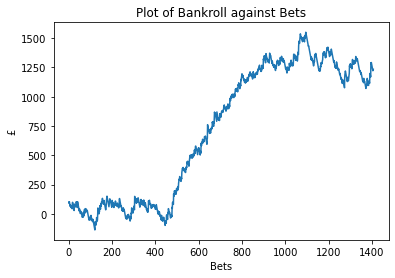

In [127]:
bankroll = 100
tracker = [bankroll]
for i in range(bets.shape[0]):
    bet = bets.iloc[i]
    bankroll = bankroll - bet['Staked'] + bet['Returned']
    tracker.append(bankroll)

plt.plot(tracker)
plt.xlabel('Bets')
plt.ylabel('£')
plt.title('Plot of Bankroll against Bets')
plt.show()

We choose to bet on home or away wins with different thresholds. We choose home threshold of 0.08 and away threshold of 0.05

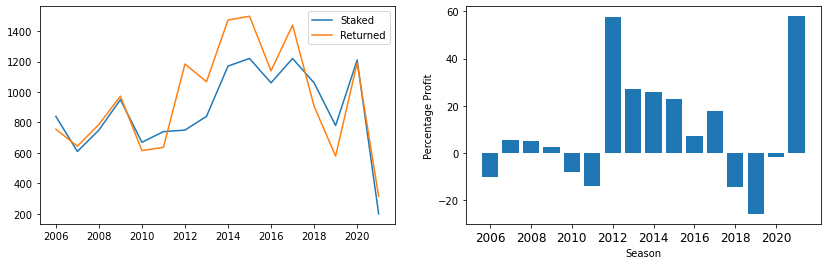

In [128]:
seasons = np.unique(bets['SEA'])
season_staked = [0]*len(seasons)
season_returned = [0]*len(seasons)

for i in range(len(seasons)):
    season = seasons[i]
    bet = bets[bets['SEA']==season]
    season_staked[i] = sum(bet['Staked'])
    season_returned[i] = sum(bet['Returned'])

seasonal=pd.DataFrame({'Season':seasons, 'Staked':season_staked, 'Returned':season_returned})
seasonal['Profit'] = seasonal['Returned'] - seasonal['Staked']
seasonal['Percentage Profit'] = seasonal['Profit']/seasonal['Staked']*100

#display(seasonal)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.plot(seasonal['Season'], seasonal['Staked'], label='Staked')
ax1.plot(seasonal['Season'], seasonal['Returned'], label='Returned')
ax1.legend()

ax2.bar(x=range(len(seasonal)), height=seasonal['Percentage Profit'], tick_label=seasonal['Season'])
ax2.set_xticks(np.arange(0, len(seasonal), 2)) 
ax2.set_xticklabels(seasons[np.arange(0, len(seasonal), 2)], fontsize=12)
ax2.set_xlabel('Season')
ax2.set_ylabel('Percentage Profit')

plt.show()

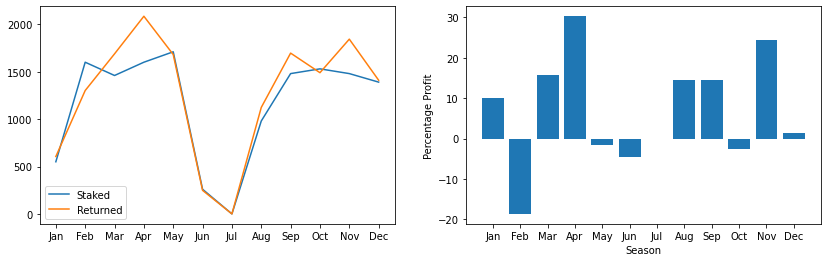

In [243]:
month_staked = [0]*12
month_returned = [0]*12

for i in range(bets.shape[0]):
    bet = bets.iloc[i, :].copy()
    month = bet['Date'].month - 1
    month_staked[month] += bet['Staked']
    month_returned[month] += bet['Returned']

monthly=pd.DataFrame({'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                     'Staked':month_staked, 'Returned':month_returned})
monthly['Profit'] = monthly['Returned'] - monthly['Staked']
monthly['Percentage Profit'] = monthly['Profit']/monthly['Staked']*100

#display(monthly)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.plot(monthly['Month'], monthly['Staked'], label='Staked')
ax1.plot(monthly['Month'], monthly['Returned'], label='Returned')
ax1.legend()

ax2.bar(x=range(12), height=monthly['Percentage Profit'], tick_label=monthly['Month'])
ax2.set_xlabel('Season')
ax2.set_ylabel('Percentage Profit')
plt.show()

In [129]:
bet2021 = bets[bets['SEA']==2021]
display(bet2021)
print('Staked: £' + str(sum(bet2021['Staked'])))
print('Returned: £' + str(round(sum(bet2021['Returned']), 2)))
print('Percentage Profit: ' + str(round((sum(bet2021['Returned'])/sum(bet2021['Staked'])-1)*100, 2)) + '%')

,Div,SEA,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,BbMxA,BetHome,BetDraw,BetAway,PHome,PDraw,PAway,Type,Staked,Returned
1387,D1,2021,2020-09-19,FC Koln,Hoffenheim,2,3,A,2.70,3.88,2.69,0.370370,0.257732,0.371747,0.332754,0.232033,0.435214,A,10,26.9
1388,D1,2021,2020-09-19,Werder Bremen,Hertha,1,4,A,2.72,3.75,2.75,0.367647,0.266667,0.363636,0.479588,0.237850,0.282561,H,10,0
1389,D1,2021,2020-09-20,Wolfsburg,Leverkusen,0,0,D,3.05,3.62,2.52,0.327869,0.276243,0.396825,0.411345,0.243826,0.344829,H,10,0
1390,D1,2021,2020-09-26,Augsburg,Dortmund,2,0,H,7.60,5.15,1.46,0.131579,0.194175,0.684932,0.228421,0.204769,0.566810,H,10,76
1391,D1,2021,2020-09-26,Bielefeld,FC Koln,1,0,H,2.85,3.65,2.61,0.350877,0.273973,0.383142,0.463344,0.261902,0.274754,H,10,28.5
1392,D1,2021,2020-09-26,Leverkusen,RB Leipzig,1,1,D,3.18,3.81,2.38,0.314465,0.262467,0.420168,0.414854,0.242089,0.343057,H,10,0
1393,D1,2021,2020-09-26,Mainz,Stuttgart,1,4,A,2.57,3.70,2.95,0.389105,0.270270,0.338983,0.555966,0.240518,0.203516,H,10,0
1394,D1,2021,2020-09-26,Schalke 04,Werder Bremen,1,3,A,2.65,3.60,2.82,0.377358,0.277778,0.354610,0.459051,0.248641,0.292308,H,10,0
1395,D1,2021,2020-09-27,Hoffenheim,Bayern Munich,4,1,H,13.00,7.60,1.27,0.076923,0.131579,0.787402,0.201500,0.200220,0.598280,H,10,130
1396,D1,2021,2020-09-27,Freiburg,Wolfsburg,1,1,D,3.20,3.60,2.40,0.312500,0.277778,0.416667,0.433196,0.258895,0.307909,H,10,0


Staked: £200
Returned: £315.8
Percentage Profit: 57.9%


## French Football

In [130]:
# initialise league
F1 = league()
# train on all data up to 2019/2020 season
F1.train_all(league_str='F1', SEA=range(2003, 2022))

# get betting data 
betting = F1.betting_odds(league_str='F1', SEA=list(range(2006, 2022)))
betting['PHome'] = np.array(F1.trained_data[F1.trained_data['SEA']>2005]['PHome'])
betting['PDraw'] = np.array(F1.trained_data[F1.trained_data['SEA']>2005]['PDraw'])
betting['PAway'] = np.array(F1.trained_data[F1.trained_data['SEA']>2005]['PAway'])
betting.head(5)

Training Complete


,Div,SEA,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,BbMxA,BetHome,BetDraw,BetAway,PHome,PDraw,PAway
0,F1,2006,2005-07-29,Paris SG,Metz,4,1,H,1.60,3.85,9.00,0.625000,0.259740,0.111111,0.554536,0.277704,0.167759
1,F1,2006,2005-07-30,Lille,Rennes,1,0,H,1.95,3.25,5.00,0.512821,0.307692,0.200000,0.486413,0.273788,0.239800
2,F1,2006,2005-07-30,Marseille,Bordeaux,0,2,A,1.80,3.40,5.75,0.555556,0.294118,0.173913,0.510142,0.265997,0.223861
3,F1,2006,2005-07-30,Nancy,Monaco,0,1,A,4.75,3.20,2.25,0.210526,0.312500,0.444444,0.245757,0.278356,0.475886
4,F1,2006,2005-07-30,Nantes,Lens,2,0,H,2.42,3.15,3.80,0.413223,0.317460,0.263158,0.429110,0.312861,0.258029


In [245]:
thresholds = np.arange(0, 0.11, 0.01)
thresh_df = pd.DataFrame(columns = ['Type', 'Thresh', 'Staked', 'Returned'])
stakes = 10
for thresh in thresholds:
    print('     ', end="\r")
    print(thresh, end="\r")
    stakedH = 0; stakedD = 0; stakedA = 0
    returnedH = 0; returnedD = 0; returnedA = 0
    bets = pd.DataFrame(columns = np.append(betting.columns, ['Type', 'Staked', 'Returned']))
    
    for i in range(betting.shape[0]):
        bet = betting.loc[i,:].copy()
        if bet['PHome'] - bet['BetHome'] > thresh:
            returns = 0
            stakedH += stakes
            if bet['FTR']=='H':
                returns = 10*bet['BbMxH']
                returned += returns
            bet['Type'] = 'H'
            bet['Staked'] = stakes
            bet['Returned'] = returns
            bets = bets.append(bet, ignore_index=True)
        if bet['PDraw'] - bet['BetDraw'] > thresh:
            returns = 0
            stakedD += stakes
            if bet['FTR']=='D':
                returns = 10*bet['BbMxD']
                returned += returns
            bet['Type'] = 'D'
            bet['Staked'] = stakes
            bet['Returned'] = returns
            bets = bets.append(bet, ignore_index=True)
        if bet['PAway'] - bet['BetAway'] > thresh:
            returns = 0
            stakedA += stakes
            if bet['FTR']=='A':
                returns = 10*bet['BbMxA']
                returned += returns
            bet['Type'] = 'A'
            bet['Staked'] = stakes
            bet['Returned'] = returns
            bets = bets.append(bet, ignore_index=True)
    thresh_df = thresh_df.append(pd.DataFrame(data=[['H', thresh, sum(bets[bets['Type']=='H']['Staked']), sum(bets[bets['Type']=='H']['Returned'])]], 
                    columns=['Type', 'Thresh', 'Staked', 'Returned']), ignore_index=True)
    thresh_df = thresh_df.append(pd.DataFrame(data=[['D', thresh, sum(bets[bets['Type']=='D']['Staked']), sum(bets[bets['Type']=='D']['Returned'])]], 
                    columns=['Type', 'Thresh', 'Staked', 'Returned']), ignore_index=True)
    thresh_df = thresh_df.append(pd.DataFrame(data=[['A', thresh, sum(bets[bets['Type']=='A']['Staked']), sum(bets[bets['Type']=='A']['Returned'])]], 
                    columns=['Type', 'Thresh', 'Staked', 'Returned']), ignore_index=True)

In [246]:
thresh_df['Profit'] = thresh_df['Returned'] - thresh_df['Staked']
thresh_df['Percentage Profit'] = thresh_df['Profit']/thresh_df['Staked'] * 100

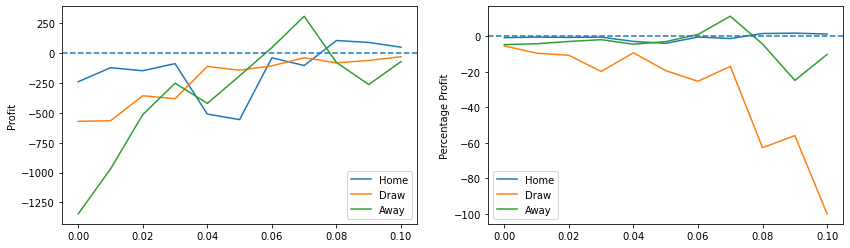

In [247]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.plot('Thresh', 'Profit', data=thresh_df[thresh_df['Type']=='H'], label='Home')
ax1.plot('Thresh', 'Profit', data=thresh_df[thresh_df['Type']=='D'], label='Draw')
ax1.plot('Thresh', 'Profit', data=thresh_df[thresh_df['Type']=='A'], label='Away')
ax1.legend()
ax1.set_ylabel('Profit')
ax1.axhline(y=0, linestyle='--')

ax2.plot('Thresh', 'Percentage Profit', data=thresh_df[thresh_df['Type']=='H'], label='Home')
ax2.plot('Thresh', 'Percentage Profit', data=thresh_df[thresh_df['Type']=='D'], label='Draw')
ax2.plot('Thresh', 'Percentage Profit', data=thresh_df[thresh_df['Type']=='A'], label='Away')
ax2.legend()
ax2.set_ylabel('Percentage Profit')
ax2.axhline(y=0, linestyle='--')
plt.show()

In [131]:
threshH = 0.08
threshA = 0.07
staked = 0
returned = 0
bets = pd.DataFrame(columns = np.append(betting.columns, ['Type', 'Staked', 'Returned']))
for i in range(betting.shape[0]):
    stakes = 0
    returns = 0
    bet = betting.loc[i,:].copy()
    if bet['PHome'] - bet['BetHome'] > threshH:
        stakes = 10
        staked += stakes
        if bet['FTR']=='H':
            returns = 10*bet['BbMxH']
            returned += returns
        bet['Type'] = 'H'
        bet['Staked'] = stakes
        bet['Returned'] = returns
        bets = bets.append(bet, ignore_index=True)
    if bet['PAway'] - bet['BetAway'] > threshA:
        stakes = 10
        staked += stakes
        if bet['FTR']=='A':
            returns = 10*bet['BbMxA']
            returned += returns
        bet['Type'] = 'A'
        bet['Staked'] = stakes
        bet['Returned'] = returns
        bets = bets.append(bet, ignore_index=True)
bets[np.append(betting.columns, ['Type', 'Staked', 'Returned'])].head()

,Div,SEA,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,BbMxA,BetHome,BetDraw,BetAway,PHome,PDraw,PAway,Type,Staked,Returned
0,F1,2006,2005-07-30,Sochaux,Toulouse,0,1,A,2.25,3.10,3.95,0.444444,0.322581,0.253165,0.556884,0.265591,0.177524,H,10,0
1,F1,2006,2005-08-06,Sochaux,Paris SG,0,1,A,3.40,3.05,2.60,0.294118,0.327869,0.384615,0.413225,0.296605,0.290171,H,10,0
2,F1,2006,2005-08-06,Toulouse,Nice,0,2,A,2.10,3.20,5.00,0.476190,0.312500,0.200000,0.389992,0.320927,0.289081,A,10,50
3,F1,2006,2005-08-14,Marseille,Lyon,1,1,D,3.40,3.05,2.60,0.294118,0.327869,0.384615,0.244606,0.283581,0.471813,A,10,0
4,F1,2006,2005-08-20,Rennes,Marseille,3,2,H,2.70,3.00,3.30,0.370370,0.333333,0.303030,0.493401,0.251556,0.255043,H,10,27


In [132]:
print('Money Staked: £' + str(sum(bets['Staked'])))
print('Money Returned: £' + str(round(sum(bets['Returned']), 2)))
print('Total Profit: £' + str(round(sum(bets['Returned'])-sum(bets['Staked']), 2)))
print('Average Percentage Profit: ' + str(round((sum(bets['Returned']-bets['Staked']))/sum(bets['Staked'])*100, 2)) + '%')

Money Staked: £9250
Money Returned: £9659.8
Total Profit: £409.8
Average Percentage Profit: 4.43%


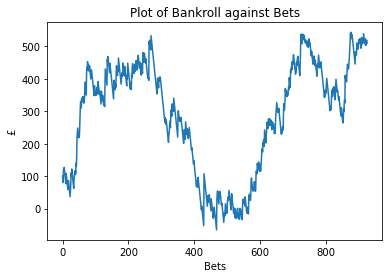

In [133]:
bankroll = 100
tracker = [bankroll]
for i in range(bets.shape[0]):
    bet = bets.iloc[i]
    bankroll = bankroll - bet['Staked'] + bet['Returned']
    tracker.append(bankroll)

plt.plot(tracker)
plt.xlabel('Bets')
plt.ylabel('£')
plt.title('Plot of Bankroll against Bets')
plt.show()

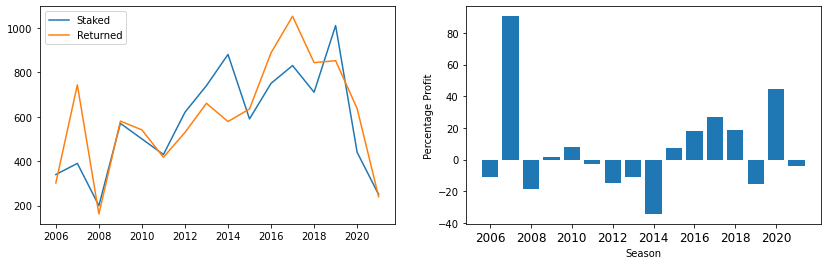

In [134]:
seasons = np.unique(bets['SEA'])
season_staked = [0]*len(seasons)
season_returned = [0]*len(seasons)

for i in range(len(seasons)):
    season = seasons[i]
    bet = bets[bets['SEA']==season]
    season_staked[i] = sum(bet['Staked'])
    season_returned[i] = sum(bet['Returned'])

seasonal=pd.DataFrame({'Season':seasons, 'Staked':season_staked, 'Returned':season_returned})
seasonal['Profit'] = seasonal['Returned'] - seasonal['Staked']
seasonal['Percentage Profit'] = seasonal['Profit']/seasonal['Staked']*100

#display(seasonal)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.plot(seasonal['Season'], seasonal['Staked'], label='Staked')
ax1.plot(seasonal['Season'], seasonal['Returned'], label='Returned')
ax1.legend()

ax2.bar(x=range(len(seasonal)), height=seasonal['Percentage Profit'], tick_label=seasonal['Season'])
ax2.set_xticks(np.arange(0, len(seasonal), 2)) 
ax2.set_xticklabels(seasons[np.arange(0, len(seasonal), 2)], fontsize=12)
ax2.set_xlabel('Season')
ax2.set_ylabel('Percentage Profit')

plt.show()

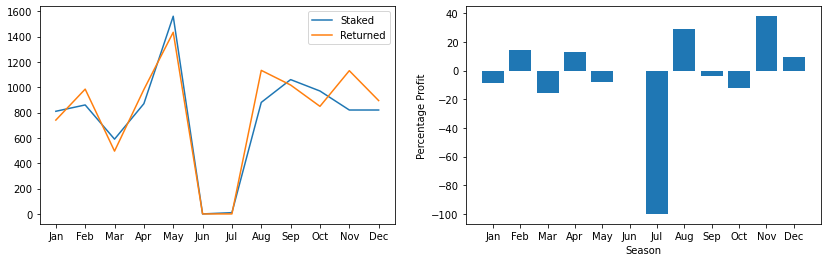

In [135]:
month_staked = [0]*12
month_returned = [0]*12

for i in range(bets.shape[0]):
    bet = bets.iloc[i, :].copy()
    month = bet['Date'].month - 1
    month_staked[month] += bet['Staked']
    month_returned[month] += bet['Returned']

monthly=pd.DataFrame({'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                     'Staked':month_staked, 'Returned':month_returned})
monthly['Profit'] = monthly['Returned'] - monthly['Staked']
monthly['Percentage Profit'] = monthly['Profit']/monthly['Staked']*100

#display(monthly)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.plot(monthly['Month'], monthly['Staked'], label='Staked')
ax1.plot(monthly['Month'], monthly['Returned'], label='Returned')
ax1.legend()

ax2.bar(x=range(12), height=monthly['Percentage Profit'], tick_label=monthly['Month'])
ax2.set_xlabel('Season')
ax2.set_ylabel('Percentage Profit')
plt.show()

### 2020/2021 Results

In [137]:
bet2021 = bets[bets['SEA']==2021]
display(bet2021)
print('Staked: £' + str(sum(bet2021['Staked'])))
print('Returned: £' + str(round(sum(bet2021['Returned']), 2)))
print('Percentage Profit: ' + str(round((sum(bet2021['Returned'])/sum(bet2021['Staked'])-1)*100, 2)) + '%')

,Div,SEA,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,BbMxA,BetHome,BetDraw,BetAway,PHome,PDraw,PAway,Type,Staked,Returned
900,F1,2021,2020-08-21,Bordeaux,Nantes,0,0,D,2.59,3.13,3.38,0.386100,0.319489,0.295858,0.486908,0.287784,0.225308,H,10,0
901,F1,2021,2020-08-23,Nice,Lens,2,1,H,2.12,3.54,4.25,0.471698,0.282486,0.235294,0.605828,0.238974,0.155198,H,10,21.2
902,F1,2021,2020-08-30,Metz,Monaco,0,1,A,3.98,3.65,2.10,0.251256,0.273973,0.476190,0.352348,0.263391,0.384261,H,10,0
903,F1,2021,2020-08-30,St Etienne,Lorient,2,0,H,2.36,3.46,3.55,0.423729,0.289017,0.281690,0.574343,0.241806,0.183851,H,10,23.6
904,F1,2021,2020-09-10,Lens,Paris SG,1,0,H,5.60,4.25,1.73,0.178571,0.235294,0.578035,0.106582,0.167254,0.726165,A,10,0
905,F1,2021,2020-09-11,Bordeaux,Lyon,0,0,D,4.75,3.65,2.01,0.210526,0.273973,0.497512,0.360838,0.268201,0.370961,H,10,0
906,F1,2021,2020-09-13,Paris SG,Marseille,0,1,A,1.73,5.20,5.00,0.578035,0.192308,0.200000,0.772731,0.134968,0.092301,H,10,0
907,F1,2021,2020-09-15,Montpellier,Lyon,2,1,H,4.00,3.52,2.13,0.250000,0.284091,0.469484,0.359612,0.261933,0.378455,H,10,40
908,F1,2021,2020-09-16,Paris SG,Metz,1,0,H,1.30,7.00,11.75,0.769231,0.142857,0.085106,0.869534,0.093064,0.037402,H,10,13
909,F1,2021,2020-09-17,Marseille,St Etienne,0,2,A,2.09,3.50,4.33,0.478469,0.285714,0.230947,0.607141,0.219248,0.173611,H,10,0


Staked: £250
Returned: £240.1
Percentage Profit: -3.96%


## Scottish Football

In [142]:
SC0 = league()
SC0.train_all(league_str='SC0', SEA=range(2001, 2022))

# get betting data 
betting = SC0.betting_odds(league_str='SC0', SEA=list(range(2006, 2022)))
betting['PHome'] = np.array(SC0.trained_data[SC0.trained_data['SEA']>2005]['PHome'])
betting['PDraw'] = np.array(SC0.trained_data[SC0.trained_data['SEA']>2005]['PDraw'])
betting['PAway'] = np.array(SC0.trained_data[SC0.trained_data['SEA']>2005]['PAway'])
betting.head(5)

Training Complete


,Div,SEA,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,BbMxA,BetHome,BetDraw,BetAway,PHome,PDraw,PAway
0,SC0,2006,2005-07-30,Dundee United,Aberdeen,1,1,D,2.70,3.35,2.65,0.370370,0.298507,0.377358,0.382497,0.289756,0.327747
1,SC0,2006,2005-07-30,Falkirk,Inverness C,0,2,A,2.70,3.40,2.90,0.370370,0.294118,0.344828,0.415125,0.303109,0.281765
2,SC0,2006,2005-07-30,Hibernian,Dunfermline,1,1,D,1.63,3.65,6.40,0.613497,0.273973,0.156250,0.609804,0.214371,0.175826
3,SC0,2006,2005-07-30,Kilmarnock,Hearts,2,4,A,2.65,3.35,2.60,0.377358,0.298507,0.384615,0.368245,0.275331,0.356424
4,SC0,2006,2005-07-30,Motherwell,Celtic,4,4,D,9.00,5.00,1.44,0.111111,0.200000,0.694444,0.170275,0.220751,0.608974


In [254]:
thresholds = np.arange(0, 0.11, 0.01)
thresh_df = pd.DataFrame(columns = ['Type', 'Thresh', 'Staked', 'Returned'])
stakes = 10
for thresh in thresholds:
    print('     ', end="\r")
    print(thresh, end="\r")
    stakedH = 0; stakedD = 0; stakedA = 0
    returnedH = 0; returnedD = 0; returnedA = 0
    bets = pd.DataFrame(columns = np.append(betting.columns, ['Type', 'Staked', 'Returned']))
    
    for i in range(betting.shape[0]):
        bet = betting.loc[i,:].copy()
        if bet['PHome'] - bet['BetHome'] > thresh:
            returns = 0
            stakedH += stakes
            if bet['FTR']=='H':
                returns = 10*bet['BbMxH']
                returned += returns
            bet['Type'] = 'H'
            bet['Staked'] = stakes
            bet['Returned'] = returns
            bets = bets.append(bet, ignore_index=True)
        if bet['PDraw'] - bet['BetDraw'] > thresh:
            returns = 0
            stakedD += stakes
            if bet['FTR']=='D':
                returns = 10*bet['BbMxD']
                returned += returns
            bet['Type'] = 'D'
            bet['Staked'] = stakes
            bet['Returned'] = returns
            bets = bets.append(bet, ignore_index=True)
        if bet['PAway'] - bet['BetAway'] > thresh:
            returns = 0
            stakedA += stakes
            if bet['FTR']=='A':
                returns = 10*bet['BbMxA']
                returned += returns
            bet['Type'] = 'A'
            bet['Staked'] = stakes
            bet['Returned'] = returns
            bets = bets.append(bet, ignore_index=True)
    thresh_df = thresh_df.append(pd.DataFrame(data=[['H', thresh, sum(bets[bets['Type']=='H']['Staked']), sum(bets[bets['Type']=='H']['Returned'])]], 
                    columns=['Type', 'Thresh', 'Staked', 'Returned']), ignore_index=True)
    thresh_df = thresh_df.append(pd.DataFrame(data=[['D', thresh, sum(bets[bets['Type']=='D']['Staked']), sum(bets[bets['Type']=='D']['Returned'])]], 
                    columns=['Type', 'Thresh', 'Staked', 'Returned']), ignore_index=True)
    thresh_df = thresh_df.append(pd.DataFrame(data=[['A', thresh, sum(bets[bets['Type']=='A']['Staked']), sum(bets[bets['Type']=='A']['Returned'])]], 
                    columns=['Type', 'Thresh', 'Staked', 'Returned']), ignore_index=True)

In [255]:
thresh_df['Profit'] = thresh_df['Returned'] - thresh_df['Staked']
thresh_df['Percentage Profit'] = thresh_df['Profit']/thresh_df['Staked'] * 100

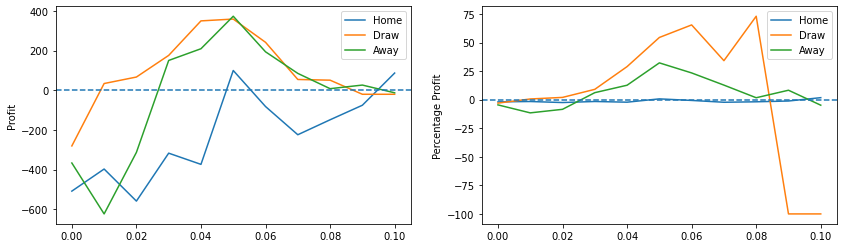

In [256]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.plot('Thresh', 'Profit', data=thresh_df[thresh_df['Type']=='H'], label='Home')
ax1.plot('Thresh', 'Profit', data=thresh_df[thresh_df['Type']=='D'], label='Draw')
ax1.plot('Thresh', 'Profit', data=thresh_df[thresh_df['Type']=='A'], label='Away')
ax1.legend()
ax1.set_ylabel('Profit')
ax1.axhline(y=0, linestyle='--')

ax2.plot('Thresh', 'Percentage Profit', data=thresh_df[thresh_df['Type']=='H'], label='Home')
ax2.plot('Thresh', 'Percentage Profit', data=thresh_df[thresh_df['Type']=='D'], label='Draw')
ax2.plot('Thresh', 'Percentage Profit', data=thresh_df[thresh_df['Type']=='A'], label='Away')
ax2.legend()
ax2.set_ylabel('Percentage Profit')
ax2.axhline(y=0, linestyle='--')
plt.show()

Thus, we choose to bet on Draws or Away games with threshold equal to 0.05

In [143]:
threshD = 0.05
threshA = 0.05
staked = 0
returned = 0
bets = pd.DataFrame(columns = np.append(betting.columns, ['Type', 'Staked', 'Returned']))
for i in range(betting.shape[0]):
    stakes = 0
    returns = 0
    bet = betting.loc[i,:].copy()
    
    if bet['PDraw'] - bet['BetDraw'] > threshD:
        stakes = 10
        staked += stakes
        if bet['FTR']=='D':
            returns = 10*bet['BbMxD']
            returned += returns
        bet['Type'] = 'D'
        bet['Staked'] = stakes
        bet['Returned'] = returns
        bets = bets.append(bet, ignore_index=True)
    
    if bet['PAway'] - bet['BetAway'] > threshA:
        stakes = 10
        staked += stakes
        if bet['FTR']=='A':
            returns = 10*bet['BbMxA']
            returned += returns
        bet['Type'] = 'A'
        bet['Staked'] = stakes
        bet['Returned'] = returns
        bets = bets.append(bet, ignore_index=True)
bets[np.append(betting.columns, ['Type', 'Staked', 'Returned'])].head()

,Div,SEA,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,BbMxA,BetHome,BetDraw,BetAway,PHome,PDraw,PAway,Type,Staked,Returned
0,SC0,2006,2005-08-06,Inverness C,Rangers,0,1,A,12.78,5.50,1.33,0.078247,0.181818,0.751880,0.152108,0.254800,0.593092,D,10,0
1,SC0,2006,2005-08-14,Aberdeen,Rangers,3,2,H,9.00,4.80,1.42,0.111111,0.208333,0.704225,0.165139,0.262928,0.571934,D,10,0
2,SC0,2006,2005-09-10,Falkirk,Rangers,1,1,D,16.00,6.05,1.25,0.062500,0.165289,0.800000,0.130928,0.221330,0.647741,D,10,60.5
3,SC0,2006,2005-10-26,Hearts,Kilmarnock,1,0,H,1.40,5.41,12.03,0.714286,0.184843,0.083126,0.667307,0.195781,0.136911,A,10,0
4,SC0,2006,2005-11-27,Hibernian,Rangers,2,1,H,3.30,3.30,2.30,0.303030,0.303030,0.434783,0.262250,0.246956,0.490794,A,10,0


In [144]:
print('Money Staked: £' + str(sum(bets['Staked'])))
print('Money Returned: £' + str(round(sum(bets['Returned']), 2)))
print('Total Profit: £' + str(round(sum(bets['Returned'])-sum(bets['Staked']), 2)))
print('Average Percentage Profit: ' + str(round((sum(bets['Returned']-bets['Staked']))/sum(bets['Staked'])*100, 2)) + '%')

Money Staked: £1820
Money Returned: £2856.2
Total Profit: £1036.2
Average Percentage Profit: 56.93%


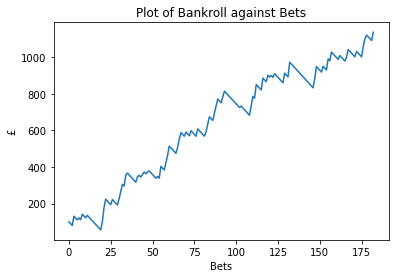

In [145]:
bankroll = 100
tracker = [bankroll]
for i in range(bets.shape[0]):
    bet = bets.iloc[i]
    bankroll = bankroll - bet['Staked'] + bet['Returned']
    tracker.append(bankroll)

plt.plot(tracker)
plt.xlabel('Bets')
plt.ylabel('£')
plt.title('Plot of Bankroll against Bets')
plt.show()

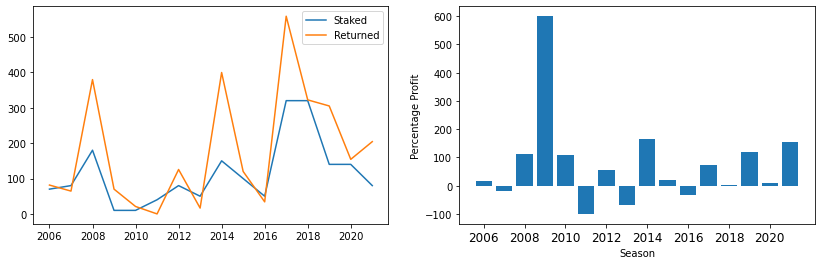

In [146]:
seasons = np.unique(bets['SEA'])
season_staked = [0]*len(seasons)
season_returned = [0]*len(seasons)

for i in range(len(seasons)):
    season = seasons[i]
    bet = bets[bets['SEA']==season]
    season_staked[i] = sum(bet['Staked'])
    season_returned[i] = sum(bet['Returned'])

seasonal=pd.DataFrame({'Season':seasons, 'Staked':season_staked, 'Returned':season_returned})
seasonal['Profit'] = seasonal['Returned'] - seasonal['Staked']
seasonal['Percentage Profit'] = seasonal['Profit']/seasonal['Staked']*100

#display(seasonal)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.plot(seasonal['Season'], seasonal['Staked'], label='Staked')
ax1.plot(seasonal['Season'], seasonal['Returned'], label='Returned')
ax1.legend()

ax2.bar(x=range(len(seasonal)), height=seasonal['Percentage Profit'], tick_label=seasonal['Season'])
ax2.set_xticks(np.arange(0, len(seasonal), 2)) 
ax2.set_xticklabels(seasons[np.arange(0, len(seasonal), 2)], fontsize=12)
ax2.set_xlabel('Season')
ax2.set_ylabel('Percentage Profit')

plt.show()

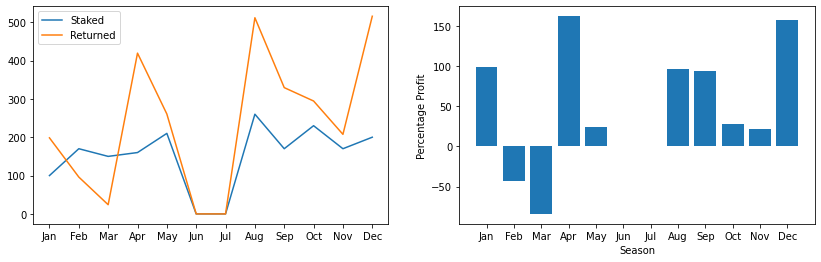

In [147]:
month_staked = [0]*12
month_returned = [0]*12

for i in range(bets.shape[0]):
    bet = bets.iloc[i, :].copy()
    month = bet['Date'].month - 1
    month_staked[month] += bet['Staked']
    month_returned[month] += bet['Returned']

monthly=pd.DataFrame({'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                     'Staked':month_staked, 'Returned':month_returned})
monthly['Profit'] = monthly['Returned'] - monthly['Staked']
monthly['Percentage Profit'] = monthly['Profit']/monthly['Staked']*100

#display(monthly)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.plot(monthly['Month'], monthly['Staked'], label='Staked')
ax1.plot(monthly['Month'], monthly['Returned'], label='Returned')
ax1.legend()

ax2.bar(x=range(12), height=monthly['Percentage Profit'], tick_label=monthly['Month'])
ax2.set_xlabel('Season')
ax2.set_ylabel('Percentage Profit')
plt.show()

### 2020/2021 Results

In [148]:
bet2021 = bets[bets['SEA']==2021]
display(bet2021)
print('Staked: £' + str(sum(bet2021['Staked'])))
print('Returned: £' + str(round(sum(bet2021['Returned']), 2)))
print('Percentage Profit: ' + str(round((sum(bet2021['Returned'])/sum(bet2021['Staked'])-1)*100, 2)) + '%')

,Div,SEA,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbMxH,BbMxD,BbMxA,BetHome,BetDraw,BetAway,PHome,PDraw,PAway,Type,Staked,Returned
174,SC0,2021,2020-08-01,Aberdeen,Rangers,0,1,A,7.70,4.95,1.49,0.129870,0.202020,0.671141,0.298119,0.269391,0.432490,D,10,0
175,SC0,2021,2020-08-09,Kilmarnock,Celtic,1,1,D,13.00,6.60,1.30,0.076923,0.151515,0.769231,0.133370,0.219792,0.646839,D,10,66
176,SC0,2021,2020-08-16,Livingston,Rangers,0,0,D,9.30,5.25,1.42,0.107527,0.190476,0.704225,0.190062,0.242322,0.567615,D,10,52.5
177,SC0,2021,2020-08-20,St Johnstone,Aberdeen,0,1,A,2.75,3.24,3.04,0.363636,0.308642,0.328947,0.304601,0.284926,0.410473,A,10,30.4
178,SC0,2021,2020-08-22,Rangers,Kilmarnock,2,0,H,1.21,8.10,19.50,0.826446,0.123457,0.051282,0.736928,0.176247,0.086826,D,10,0
179,SC0,2021,2020-08-29,Hamilton,Rangers,0,2,A,21.00,8.50,1.20,0.047619,0.117647,0.833333,0.103965,0.189443,0.706593,D,10,0
180,SC0,2021,2020-09-27,Motherwell,Rangers,1,5,A,9.50,5.53,1.37,0.105263,0.180832,0.729927,0.183581,0.245442,0.570976,D,10,0
181,SC0,2021,2020-10-17,Livingston,Kilmarnock,1,3,A,1.75,4.17,5.53,0.571429,0.239808,0.180832,0.423975,0.283871,0.292154,A,10,55.3


Staked: £80
Returned: £204.2
Percentage Profit: 155.25%


In [149]:
print('Premier League: ' + str(np.mean(PL.trained_data['BS'])))
print('La Liga: ' + str(np.mean(SP1.trained_data['BS'])))
print('Bundesliga: ' + str(np.mean(D1.trained_data['BS'])))
print('Ligue 1: ' + str(np.mean(F1.trained_data['BS'])))
print('Scottish Premier League: ' + str(np.mean(SC0.trained_data['BS'])))

Premier League: 0.5852818573921842
La Liga: 0.5903744708337839
Bundesliga: 0.6049342793312359
Ligue 1: 0.6113560904007439
Scottish Premier League: 0.5785552544121133
